# Equivalent layer technique for estimating total magnetization direction : Iteration process and L-curve application 

Notebook to perform the inversion process. The L-curve 

## Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st

from fatiando.gridder import regular

In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

## Importing my package

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

## Loading the model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

## Loading observation points

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

## Loading data set

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Open a dictionary

In [10]:
result_RM_airb = dict()

## List of saved files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


## Airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer

### Layer depth

In [18]:
h = 1150.

### Generating the equivalent sources coordinates

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

## Iteration process : LM-NNLS for positive magnetic-moment distribution

In [21]:
i_pos = 1250

In [22]:
it_max = 30

In [23]:
it_marq = 15

In [24]:
lamb = 10.
dlamb = 100.

In [25]:
eps_e = 1e-4
eps_i = 1e-4

In [26]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,2*1e6] 

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.789750266994016 -7.798072114882271
0.1227433455454775
i = 1
-19.71750993564163 -5.250655627284701
0.08836086440149073
i = 2
-22.58168624668539 -2.607517573111223
0.06644505640558317
i = 3
-24.767529213630507 -0.020588310412284858
0.05163112922128951
i = 4
-26.50105175681035 2.571121531550592
0.04387809109330396
i = 5
-27.872937351225936 5.228788874747407
0.040462705680317436
i = 6
-28.92313504754997 7.939125365965473
0.03928843287444506
i = 7
-29.684086968812025 10.580603765368888
0.037094889803934605
i = 8
-30.200939037411473 13.049704447063258
0.033559122247265157
i = 9
-30.50336108259798 15.31362993231966
0.029756479779655072
i = 10
-30.64268787607463 17.333019172062382
0.02535623207054819
i = 11
-30.66972504010418 19.0925094473367
0.02070499835567328
i = 12
-30.6294402338491 20.604102369986432
0.016368297433761447
i = 13
-30.553891376309583 21.878773143841805
0.012351771315037887
i = 14
-30.462189714331316 22.9419984779838
0.009024168506156876
i = 15
-30.365286536536082 2

-30.462064401861355 22.94266936331801
0.008939937461933833
i = 15
-30.36516745555062 23.825152412980803
0.006408922638537017
i = 16
-30.27431202220132 24.56333694884819
0.004612364868210971
i = 17
-30.19466023399725 25.18232822818564
0.003303877854231701
i = 18
-30.125534088929246 25.710304323478592
0.002435495657326887
i = 19
-30.062856772067484 26.180703308871983
0.0019534520087299244
i = 20
-30.00605470485655 26.60233780176174
0.0015828375790728922
i = 21
-29.954067617523016 26.98950376618397
0.001342882289244732
i = 22
-29.908248494330465 27.34208571530751
0.001117169915322589
i = 23
-29.866689634804434 27.66427806288619
0.000936611133091839
i = 24
-29.82739647319562 27.962403438392023
0.0008062525300375599
i = 25
-29.789089667524944 28.241070974954898
0.000709107066307523
i = 26
-29.750035735817157 28.503629853525826
0.0006356318630779499
i = 27
-29.710531992133806 28.750770148081966
0.0005687239859193029
i = 28
-29.67078503262972 28.983149014446777
0.0005079241514082244
i = 29
-2

-29.419636154535425 29.68537841398004
0.00029988392690347696
i = 32
-29.380228071797475 29.871629578088406
0.000273775384011086
i = 33
-29.340344514284457 30.048453090711117
0.00025012326383882355
i = 34
-29.30025870813623 30.216846760136733
0.0002297581493484986
i = 35
-29.259745090525772 30.377419787776766
0.00021200358360815556
i = 36
-29.218858126852723 30.530620073135367
0.00019598875398146404
i = 37
-29.177572796038024 30.67707030787374
0.00018205396998800905
i = 38
-29.135316728174327 30.81798252801961
0.0001719183453089885
i = 39
-29.091856546275288 30.952649721739295
0.00016108386849831018
i = 40
-29.047287190561878 31.081040237084142
0.00015062564191762316
i = 41
-29.001758750050357 31.203539296691787
0.00014123577260006552
i = 42
-28.95537414348828 31.320574625878173
0.00013294522058698125
i = 43
-28.90836342724545 31.43236358725153
0.00012512873703145107
i = 44
-28.86101014289913 31.53899521477073
0.00011745023529672394
i = 45
-28.8134474927803 31.64076952797268
0.000110405

-30.34545385789676 31.26814627791516
0.0


## L-curve visualization

<Figure size 648x648 with 0 Axes>

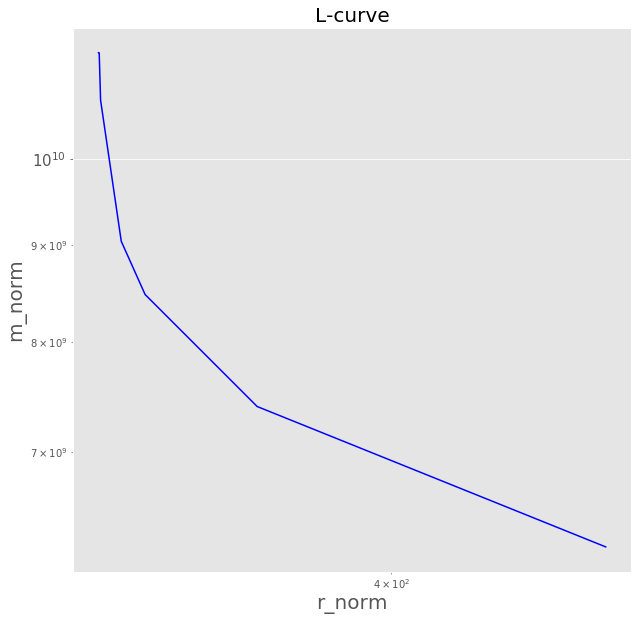

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Results

In [29]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  data/result_RM_airb.pickle
